In [2]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit nicer
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)     # Wider charts
plt.rcParams['figure.dpi'] = 120            # Sharper charts
plt.rcParams['figure.autolayout'] = True    # Prevent cutoff
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


# ML & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML models (classification)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings("ignore")  # to keep output clean for teaching

In [5]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
df= sns.load_dataset('titanic')

# Show first 5 rows
df.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:

print("Columns before cleaning:", df.columns.tolist())

# Columns to drop (only drop if they exist)
cols_to_drop = ['deck', 'embark_town', 'alive', 'class', 'who']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Fill missing values
if 'age' in df.columns:
    df['age'].fillna(df['age'].median(), inplace=True)

if 'embarked' in df.columns:
    df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Optional: encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



categorical_cols = ['sex', 'embarked']
numerical_cols = ['pclass','age','sibsp','parch','fare']

y = df['survived']
X = df.drop('survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])


Columns before cleaning: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone', 'sex_male', 'embarked_Q', 'embarked_S']


In [11]:
 
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB()
}


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Split features and target
X = df.drop('survived', axis=1)  # replace 'survived' with your target column
y = df['survived']

# Make sure these columns exist
numeric_features = [c for c in ['age', 'fare'] if c in X.columns]
categorical_features = [c for c in ['sex', 'embarked'] if c in X.columns]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}
print(results)




results_before = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results_before.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    })

df_before = pd.DataFrame(results_before)
print(" Results BEFORE tuning:\n", df_before)


{'Accuracy': 0.6480446927374302, 'Precision': 0.7619047619047619, 'Recall': 0.21621621621621623, 'F1-score': 0.3368421052631579}
 Results BEFORE tuning:
                 Model  Accuracy  Precision    Recall  F1-score
0  LogisticRegression  0.648045   0.761905  0.216216  0.336842
1        DecisionTree  0.670391   0.636364  0.472973  0.542636
2        RandomForest  0.687151   0.666667  0.486486  0.562500
3          KNeighbors  0.642458   0.596154  0.418919  0.492063
4                 SVC  0.675978   0.766667  0.310811  0.442308
5          GaussianNB  0.648045   0.761905  0.216216  0.336842


In [33]:
param_grid = {
    'LogisticRegression': {'classifier__C':[0.1,1,10], 'classifier__solver':['liblinear']},
    'DecisionTree': {'classifier__max_depth':[3,5,7], 'classifier__min_samples_split':[2,5,10]},
    'RandomForest': {'classifier__n_estimators':[50,100], 'classifier__max_depth':[3,5,7]},
    'KNeighbors': {'classifier__n_neighbors':[3,5,7]},
    'SVC': {'classifier__C':[0.1,1,10], 'classifier__kernel':['linear','rbf']},
    'GaussianNB': {}
}
from sklearn.model_selection import GridSearchCV

results_after = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    if param_grid[name]:
        grid = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='f1')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
    else:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
    
    results_after.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    })
    
df_after = pd.DataFrame(results_after)
print("\n Results AFTER tuning:\n")
df_after
      




 Results AFTER tuning:



,Model,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.648045,0.761905,0.216216,0.336842
1,DecisionTree,0.687151,0.764706,0.351351,0.481481
2,RandomForest,0.709497,0.866667,0.351351,0.500000
3,KNeighbors,0.642458,0.596154,0.418919,0.492063
4,SVC,0.675978,0.766667,0.310811,0.442308
5,GaussianNB,0.648045,0.761905,0.216216,0.336842


In [17]:
 
df_before_melted = df_before.melt(id_vars='Model', var_name='Metric', value_name='Score')
df_before_melted['Stage'] = 'Before Tuning'

df_after_melted = df_after.melt(id_vars='Model', var_name='Metric', value_name='Score')
df_after_melted['Stage'] = 'After Tuning'

df_combined = pd.concat([df_before_melted, df_after_melted])



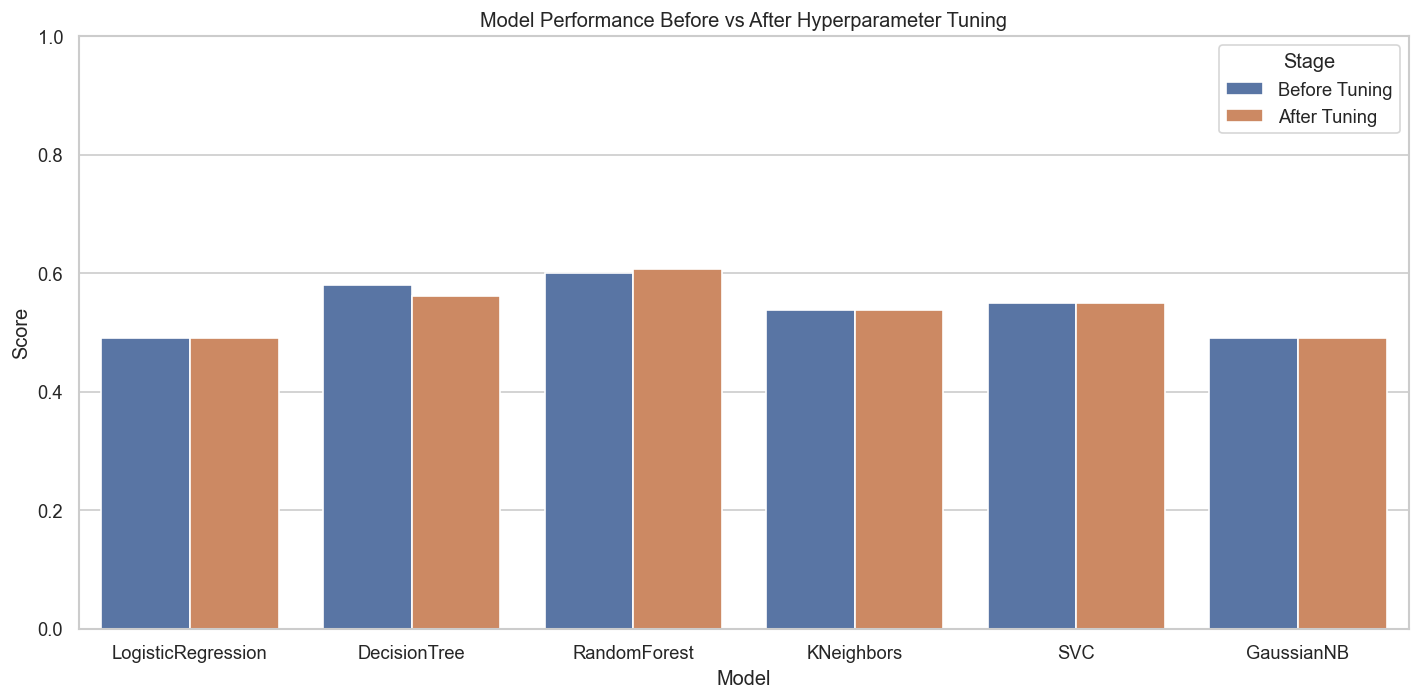

In [25]:

plt.figure(figsize=(12,6))
sns.barplot(data=df_combined, x='Model', y='Score', hue='Stage', ci=None)
plt.title('Model Performance Before vs After Hyperparameter Tuning')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()



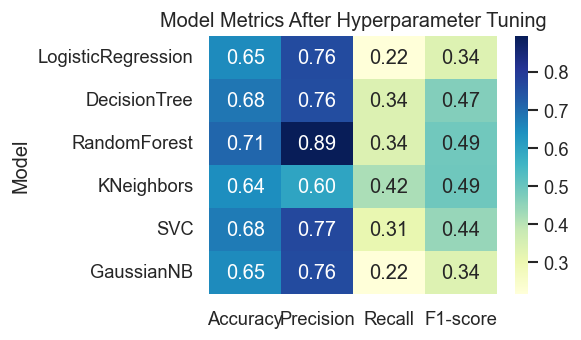

In [23]:

df_metrics = df_after.set_index('Model')
plt.figure(figsize=(5,3))
sns.heatmap(df_metrics, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Model Metrics After Hyperparameter Tuning')
plt.show()



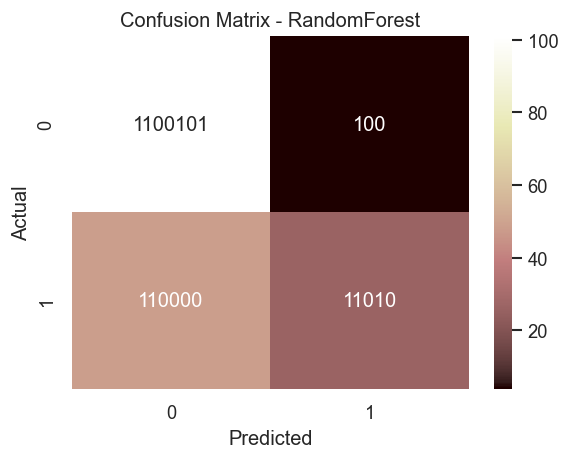

In [29]:


best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5))
])
best_pipeline.fit(X_train, y_train)
y_pred_best = best_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='b', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForest')
plt.show()